In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path=r'data\phase_var_iter1_sigma.csv'
data=pd.read_csv(data_path)
data

,sigma0,sigma1,phase_var
0,0.1,0.1,0.019081
1,0.1,0.2,0.012218
2,0.1,0.3,0.009283
3,0.1,0.4,0.007876
4,0.1,0.5,0.006824
...,...,...,...
895,3.0,2.6,0.010101
896,3.0,2.7,0.010290
897,3.0,2.8,0.010429
898,3.0,2.9,0.010607


In [3]:
min_data=data.iloc[data['phase_var'].idxmin()]
text='$\\tau_0=2us,\\tau_1=4us$;$\\sigma_0=${:.1f},$\\sigma_1=${:.1f};VAR($\\varphi$)={:.6f}[rad$^2$]'.format(min_data['sigma0'],min_data['sigma1'],min_data['phase_var'])
print(text)

$\tau_0=2us,\tau_1=4us$;$\sigma_0=$0.8,$\sigma_1=$0.7;VAR($\varphi$)=0.004677[rad$^2$]


In [4]:
import matplotlib.ticker
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

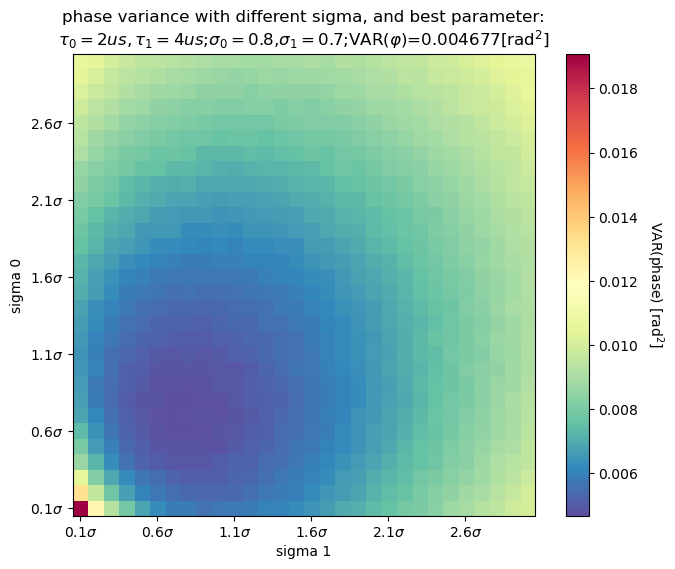

In [5]:
graphdata=data['phase_var'].values.reshape((-1,30))
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(graphdata, origin='lower',cmap='Spectral_r')

# Show all ticks and label them with the respective list entries
tick_label=['{:.1f}$\sigma$'.format(i) for i in np.arange(0.1,3.1,0.5)]
ax.set_xticks(np.arange(0,30,5), labels=tick_label)
ax.set_yticks(np.arange(0,30,5), labels=tick_label)
ax.set_xlabel('sigma 1')
ax.set_ylabel('sigma 0')

cbar=ax.figure.colorbar(im,ax=ax, shrink=1)
cbar.ax.set_ylabel('VAR(phase) [rad$^2$]', rotation=-90, va="bottom")
# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
plt.title('phase variance with different sigma, and best parameter:\n'+
          text)
plt.show()


In [6]:
data_path=r'data\m4_time_sigma.csv'
data=pd.read_csv(data_path)
mindata=data.iloc[data['phase_var'].idxmin()]
print(mindata)

sigm0            1.200000
time_exposure    2.000000
phase_var        0.007145
Name: 11, dtype: float64


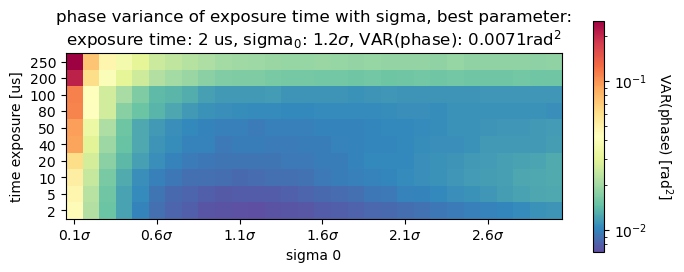

In [7]:
graphdata=data['phase_var'].values.reshape((-1,30))
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(graphdata, origin='lower',cmap='Spectral_r',norm='log')

text='exposure time: {:.0f} us, sigma$_0$: {:.1f}$\\sigma$, VAR(phase): {:.4f}rad$^2$'.format(
    mindata['time_exposure'],
    mindata['sigm0'],
    mindata['phase_var'])

# Show all ticks and label them with the respective list entries
ydata=data['time_exposure'].unique()
tick_label=['{:.1f}$\sigma$'.format(i) for i in np.arange(0.1,3.1,0.5)]
ax.set_yticks(np.arange(ydata.size),labels=ydata)
ax.set_xticks(np.arange(0,30,5), labels=tick_label)
ax.set_xlabel('sigma 0')
ax.set_ylabel('time exposure [us]')

cbar=ax.figure.colorbar(im,ax=ax, shrink=0.5)
cbar.ax.set_ylabel('VAR(phase) [rad$^2$]', rotation=-90, va="bottom")
# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
plt.title('phase variance of exposure time with sigma, best parameter:\n'+
          text)
plt.show()


In [78]:
data_path=r'data\m4_time_sigma_iter.csv'
csv_data=pd.read_csv(data_path)
mindata=csv_data.iloc[csv_data['phase_var'].idxmin()]
print(mindata)

sigma0        0.800000
sigma1        0.700000
time_iter1    2.000000
phase_var     0.004677
Name: 146, dtype: float64


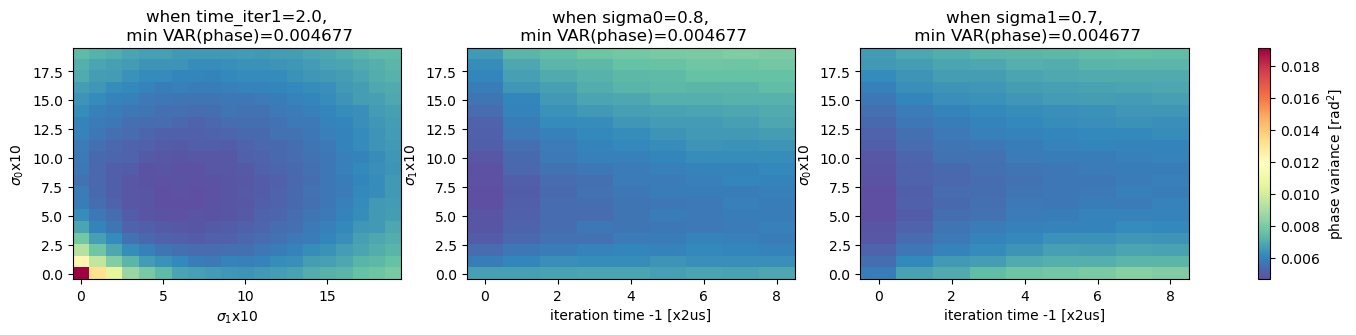

sigma0        0.800000
sigma1        0.700000
time_iter1    2.000000
phase_var     0.004677
Name: 146, dtype: float64


In [79]:
from matplotlib import colors

min_data=csv_data.iloc[(csv_data['phase_var'].idxmin())]
sigma_list=csv_data.columns[:3]
norm=colors.Normalize(vmin=np.min([csv_data.phase_var[csv_data[s3]==min_data[s3]].min() for s3 in sigma_list]), 
                      vmax=np.max([csv_data.phase_var[csv_data[s3]==min_data[s3]].max() for s3 in sigma_list]))
fig, axs = plt.subplots(1,3,figsize=(18,3))
label_dict=dict(sigma0='$\sigma_0$x10',sigma1='$\sigma_1$x10',time_iter1='iteration time -1 [x2us]')
for i in range(3):
    sigma_index=(i+np.arange(3))%3
    ax=axs[i]
    s1=sigma_list[sigma_index[0]]
    s2=sigma_list[sigma_index[1]]
    s3=sigma_list[sigma_index[2]]
    graph_data=csv_data.phase_var[csv_data[s3]==min_data[s3]].values.reshape(-1,20).T
    img=ax.imshow(graph_data,aspect='auto',origin='lower',cmap='Spectral_r',interpolation='nearest',norm=norm)
    ax.set_xlabel(label_dict[s2])
    ax.set_ylabel(label_dict[s1])
    if i==2:
        ax.set_xlabel(label_dict[s1])
        ax.set_ylabel(label_dict[s2])
    text='when {}={:.1f},\n min VAR(phase)={:.6f}'.format(s3,min_data[s3],graph_data.min())
    ax.set_title(text)
fig.colorbar(img, ax=axs,label='phase variance [rad$^2$]')
plt.show()
print(csv_data.iloc[csv_data['phase_var'].idxmin()])

sigma0       0.700000
sigma1       0.700000
sigma2       0.600000
phase_var    0.004239
Name: 2525, dtype: float64


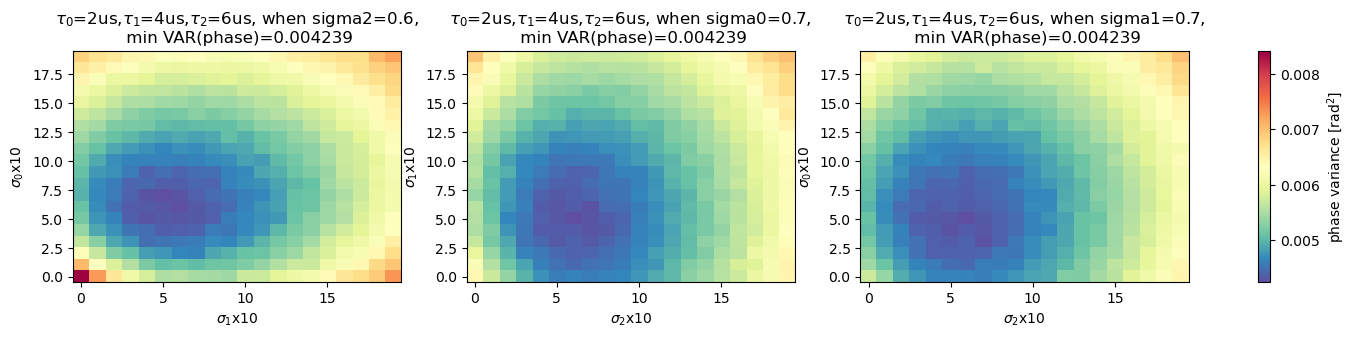

sigma0       0.700000
sigma1       0.700000
sigma2       0.600000
phase_var    0.004239
Name: 2525, dtype: float64


In [84]:
data_path=r'data\phase_var_iter2_sigma_246.csv'
csv_data=pd.read_csv(data_path)
mindata=csv_data.iloc[csv_data['phase_var'].idxmin()]
print(mindata)

min_data=csv_data.iloc[(csv_data['phase_var'].idxmin())]
sigma_list=csv_data.columns[:3]
norm=colors.Normalize(vmin=np.min([csv_data.phase_var[csv_data[s3]==min_data[s3]].min() for s3 in sigma_list]), 
                      vmax=np.max([csv_data.phase_var[csv_data[s3]==min_data[s3]].max() for s3 in sigma_list]))
fig, axs = plt.subplots(1,3,figsize=(18,3))
label_dict=dict(sigma0='$\sigma_0$x10',sigma1='$\sigma_1$x10',sigma2='$\sigma_2$x10')
for i in range(3):
    sigma_index=(i+np.arange(3))%3
    ax=axs[i]
    s1=sigma_list[sigma_index[0]]
    s2=sigma_list[sigma_index[1]]
    s3=sigma_list[sigma_index[2]]
    graph_data=csv_data.phase_var[csv_data[s3]==min_data[s3]].values.reshape(-1,20).T
    img=ax.imshow(graph_data,aspect='auto',origin='lower',cmap='Spectral_r',interpolation='nearest',norm=norm)
    ax.set_xlabel(label_dict[s2])
    ax.set_ylabel(label_dict[s1])
    if i==2:
        ax.set_xlabel(label_dict[s1])
        ax.set_ylabel(label_dict[s2])
    text=r'$\tau_0$=2us,$\tau_1$=4us,$\tau_2$=6us, '+'when {}={:.1f},\n min VAR(phase)={:.6f}'.format(s3,min_data[s3],graph_data.min())
    ax.set_title(text)
fig.colorbar(img, ax=axs,label='phase variance [rad$^2$]')
plt.show()
print(csv_data.iloc[csv_data['phase_var'].idxmin()])